# Decision  Tree Classifier:

In [1]:
import pandas as pd
import numpy as np

# Load data:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


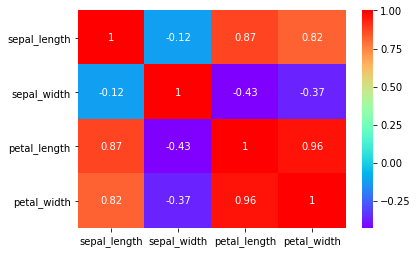

In [7]:
sns.heatmap(iris.corr(),cmap="rainbow",annot=True)

## Seprate data

In [8]:
X=iris[["sepal_length","sepal_width","petal_length","petal_width"]]
y=iris[["species"]]

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Train test split

In [10]:
# Import train test split function
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=100)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


## Decision Tree Classifier

In [12]:
 # Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier 

In [13]:
# create Decision tree classifier object
clf= DecisionTreeClassifier(criterion="entropy",max_depth=3) 

# Train Decision tree classifier
clf=clf.fit(x_train,y_train)

#Predict the response for test data
y_pred= clf.predict(x_test)
print(y_pred)
print(y_pred.shape)

['virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica']
(30,)


## Accuracy

In [14]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of Decision tree classifier is :",accuracy)

Accuracy of Decision tree classifier is : 0.9666666666666667


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      0.83      0.91         6
  virginica       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30



## Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]], dtype=int64)

From above,setosa and versicolor species are correctly classified, but there is  misclassification of virginica species.

From confusion matrix 1  virginica species is classified as versicolor species.